## Week 10 Review Session

In [1]:
import os
from glob import glob
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et

In [2]:
# Set up data directory and set it as working directory
data_dir = os.path.join(et.io.HOME,'earth-analytics','data')
if os.path.exists(data_dir):
    os.chdir(data_dir)
else:
    print("Directory did not exist. Making data directory and setting working directory: ", data_path)
    os.makedirs(data_dir)
    os.chdir(data_dir)

In [3]:
# Download California Fires Dataset
download_url = 'https://ndownloader.figshare.com/files/25033508'
et.data.get_data(url=download_url)

'/Users/judith/earth-analytics/data/earthpy-downloads/ca-fires-yearly'

### Challenge 1: Calculate the number of fires between 1992-2015 greater than 100 acres

In [4]:
file_path = os.path.join(data_dir,"earthpy-downloads","ca-fires-yearly","1992-2015-gt-100-acres","*")
file_list = glob(file_path)

num_fires = 0
for f in file_list:
    df = pd.read_csv(f)
    num_fires += df.shape[0]
    
num_fires

4101

### Challenge 2:  Concatenate annual files into single dataframe

In [5]:
file_path = os.path.join(data_dir,"earthpy-downloads","ca-fires-yearly","1992-2015-gt-100-acres","*")
file_list = glob(file_path)

annual_dfs = []
for path in file_list:
    df = pd.read_csv(path)
    df['year'] = int(path[-8:-4])
    annual_dfs.append(df)
    
all_fires = pd.concat(annual_dfs)

all_fires

,fd_unq_id,source_reporting_unit_name,fire_name,month,month_num,cause,fire_size,fire_size_class,state,county,year
0,15000792,CDF - Riverside Unit,RIVER,February,2,Missing/Undefined,122.0,D,CA,Riverside,2004
1,15001254,San Bernardino National Forest,UPPER SANTA ANA BURN ESCAPE,March,3,Missing/Undefined,350.0,E,CA,San Bernardino,2004
2,317618,Bakersfield District,FORT,April,4,Arson,150.0,D,CA,Inyo,2004
3,1311320,CDF - Merced-Mariposa Unit,RIMS FIRE,April,4,Miscellaneous,200.0,D,CA,NaN,2004
4,1311367,CDF - Merced-Mariposa Unit,210,April,4,Equipment Use,115.0,D,CA,NaN,2004
...,...,...,...,...,...,...,...,...,...,...,...
115,1300492,Dunnigan Fire Protection District,SIX,October,10,Missing/Undefined,1235.0,F,CA,Yolo,2009
116,300341742,San Mateo-Santa Cruz Unit,LOMA IC,October,10,Missing/Undefined,490.5,E,CA,NaN,2009
117,1332172,Humboldt-Del Norte Unit,IAQUA,October,10,Equipment Use,160.0,D,CA,NaN,2009
118,300331819,Humboldt-Del Norte Unit,CCSO,October,10,Missing/Undefined,250.0,D,CA,NaN,2009


### Challenge 3: Add human ignition flag and season fields

In [6]:
human_causes = ["Arson", "Smoking", "Equipment Use", "Campfire", "Powerline", "Railroad", "Debris Burning"]

# Set the human_ignition flag based on human_causes list
all_fires['human_ignition'] = all_fires['cause'].apply(lambda x: True if x in human_causes else False)
all_fires.loc[all_fires.month.isin(["March", "April", "May"]), 'season'] = 'Spring'
all_fires.loc[all_fires.month.isin(["June", "July", "August"]), 'season'] = 'Summer'
all_fires.loc[all_fires.month.isin(["September", "October", "November"]), 'season'] = 'Fall'
all_fires.loc[all_fires.month.isin(["December", "January", "February"]), 'season'] = 'winter'

all_fires

,fd_unq_id,source_reporting_unit_name,fire_name,month,month_num,cause,fire_size,fire_size_class,state,county,year,human_ignition,season
0,15000792,CDF - Riverside Unit,RIVER,February,2,Missing/Undefined,122.0,D,CA,Riverside,2004,False,winter
1,15001254,San Bernardino National Forest,UPPER SANTA ANA BURN ESCAPE,March,3,Missing/Undefined,350.0,E,CA,San Bernardino,2004,False,Spring
2,317618,Bakersfield District,FORT,April,4,Arson,150.0,D,CA,Inyo,2004,True,Spring
3,1311320,CDF - Merced-Mariposa Unit,RIMS FIRE,April,4,Miscellaneous,200.0,D,CA,NaN,2004,False,Spring
4,1311367,CDF - Merced-Mariposa Unit,210,April,4,Equipment Use,115.0,D,CA,NaN,2004,True,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1300492,Dunnigan Fire Protection District,SIX,October,10,Missing/Undefined,1235.0,F,CA,Yolo,2009,False,Fall
116,300341742,San Mateo-Santa Cruz Unit,LOMA IC,October,10,Missing/Undefined,490.5,E,CA,NaN,2009,False,Fall
117,1332172,Humboldt-Del Norte Unit,IAQUA,October,10,Equipment Use,160.0,D,CA,NaN,2009,True,Fall
118,300331819,Humboldt-Del Norte Unit,CCSO,October,10,Missing/Undefined,250.0,D,CA,NaN,2009,False,Fall


### Challenge 4: Making a copy of a dataframe versus a slice

In [7]:
print(all_fires.shape)

# Make a copy with just the rows flagged as human_ignition == True
human_fires = all_fires.loc[all_fires.human_ignition].copy()
print(human_fires.shape)

(4101, 13)
(1866, 13)


### Challenge 5: looping through nested directories

In [8]:
data_set_paths = glob(os.path.join(data_dir,"earthpy-downloads","ca-fires-yearly","*"))
data_set_paths

ca_fires_dfs = []
for path in data_set_paths:
    dataset = os.path.basename(path)
    file_list = glob(os.path.join(path,'*.csv'))
    file_list.sort()
    file_names = []
    years = []
    rows = []
    cols = []
    for file in file_list:
        df = pd.read_csv(file)
        rows.append(df.shape[0])
        cols.append(df.shape[1])
        file_name = os.path.basename(file)
        file_names.append(file_name)
        year = int(file_name[-8:-4])
        years.append(year)
    data = {'file_name' : file_names,
            'year' : years,
            'file_rows' : rows,
            'file_columns' : cols
           }
    list_df = pd.DataFrame(data, columns = ['file_name', 'year', 'file_rows', 'file_columns'])
    list_df['dataset'] = dataset
    ca_fires_dfs.append(list_df)

ca_fires_catalog = pd.concat(ca_fires_dfs)
ca_fires_catalog

,file_name,year,file_rows,file_columns,dataset
0,monthly-mean-size-1992.csv,1992,1,12,monthly-mean-size
1,monthly-mean-size-1993.csv,1993,1,12,monthly-mean-size
2,monthly-mean-size-1994.csv,1994,1,12,monthly-mean-size
3,monthly-mean-size-1995.csv,1995,1,12,monthly-mean-size
4,monthly-mean-size-1996.csv,1996,1,12,monthly-mean-size
...,...,...,...,...,...
19,gt-100-acres-2011.csv,2011,139,10,1992-2015-gt-100-acres
20,gt-100-acres-2012.csv,2012,127,10,1992-2015-gt-100-acres
21,gt-100-acres-2013.csv,2013,122,10,1992-2015-gt-100-acres
22,gt-100-acres-2014.csv,2014,90,10,1992-2015-gt-100-acres


### Challenge 6: Convert challenge 5 into a function

In [9]:
def create_dataset_catalog(data_folder, year_index):
    """Loop through directories in data_folder, creating a list of 
    files contained in each dataset (directory name), the year, and
    size dimensions for each file.
    
    Parameters
    ----------
    data_folder : str
        Parent path for data directories.
    year_index : tuple of int
        two integer values indicating start and ending index for year
        in the filename for each datafile.

    Returns
    ------
    ca_fires_df : numpy array
        Mean values of input array in inches.
    """    
    
    data_set_paths = glob(os.path.join(data_folder,"*"))
    all_dfs = []
    for path in data_set_paths:
        dataset = os.path.basename(path)
        file_list = glob(os.path.join(path,'*.csv'))
        file_list.sort()
        file_names = []
        years = []
        rows = []
        cols = []
        for file in file_list:
            df = pd.read_csv(file)
            rows.append(df.shape[0])
            cols.append(df.shape[1])
            file_name = os.path.basename(file)
            file_names.append(file_name)
            year = int(file_name[-8:-4])
            years.append(year)
        data = {'file_name' : file_names,
                'year' : years,
                'file_rows' : rows,
                'file_columns' : cols
               }
        single_cat_df = pd.DataFrame(data, columns = ['file_name', 'year', 'file_rows', 'file_columns'])
        single_cat_df['dataset'] = dataset
        all_dfs.append(single_cat_df)
    catalog_df = pd.concat(all_dfs)
    return catalog_df     


### Challenge 7: Call create_dataset_catalog

In [10]:
folder = os.path.join(data_dir,"earthpy-downloads","ca-fires-yearly")
fire_catalog = create_dataset_catalog(folder, (-8,-4))
fire_catalog

,file_name,year,file_rows,file_columns,dataset
0,monthly-mean-size-1992.csv,1992,1,12,monthly-mean-size
1,monthly-mean-size-1993.csv,1993,1,12,monthly-mean-size
2,monthly-mean-size-1994.csv,1994,1,12,monthly-mean-size
3,monthly-mean-size-1995.csv,1995,1,12,monthly-mean-size
4,monthly-mean-size-1996.csv,1996,1,12,monthly-mean-size
...,...,...,...,...,...
19,gt-100-acres-2011.csv,2011,139,10,1992-2015-gt-100-acres
20,gt-100-acres-2012.csv,2012,127,10,1992-2015-gt-100-acres
21,gt-100-acres-2013.csv,2013,122,10,1992-2015-gt-100-acres
22,gt-100-acres-2014.csv,2014,90,10,1992-2015-gt-100-acres


### Challenge 8: Call help for catalog function

In [11]:
help(create_dataset_catalog)

Help on function create_dataset_catalog in module __main__:

create_dataset_catalog(data_folder, year_index)
    Loop through directories in data_folder, creating a list of 
    files contained in each dataset (directory name), the year, and
    size dimensions for each file.
    
    Parameters
    ----------
    data_folder : str
        Parent path for data directories.
    year_index : tuple of int
        two integer values indicating start and ending index for year
        in the filename for each datafile.
    
    Returns
    ------
    ca_fires_df : numpy array
        Mean values of input array in inches.



### Challenge 9: plot fires by cause (homework 8 challenge 10 revisited)

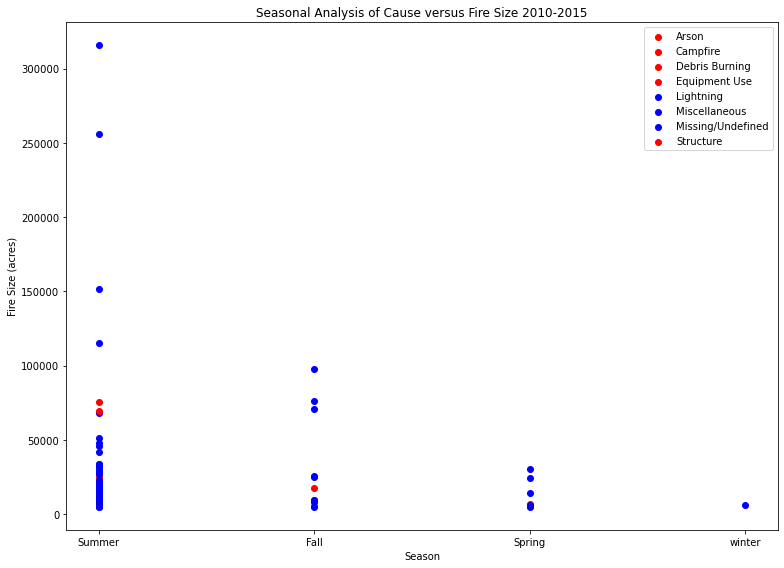

In [12]:
fire_subset = all_fires.loc[(all_fires.fire_size_class == 'G') & (all_fires.year >= 2010)]

human_causes = ["Arson", "Smoking", "Equipment Use", "Campfire", "Powerline", "Railroad", 
                "Debris Burning", "Structure"]
fig, ax = plt.subplots(figsize = (11,8))

for cause, df_subset in fire_subset.groupby("cause"):
    if cause in human_causes:
        ax.scatter(df_subset.season,
                   df_subset.fire_size,
                   label=cause,
                   color='red')
    else:
        ax.scatter(df_subset.season,
                   df_subset.fire_size,
                   label=cause,
                   color='blue')
ax.legend()
ax.set(title="Seasonal Analysis of Cause versus Fire Size 2010-2015",
       xlabel="Season",
       ylabel="Fire Size (acres)")

plt.tight_layout()